# Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import pickle

# Reading Dataset

In [2]:
#Reading the dataset
data = pd.read_csv('crop_recommendation.csv')
MODELS = '../models/'

# Data Analysis

In [3]:
#Checking the Head of the Dataset
data .head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
# Used to display information about a dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


# This dataset consists of **2200** rows in total.

**Each row has 8 columns representing Nitrogen, Phosphorous, Potassium, Temperature, Humidity, PH, Rainfall and Label**

**NPK(Nitrogen, Phosphorous and Potassium)** values represent the NPK values in the soil.
**Temperature**, **humidity** and **rainfall** are the average values of the sorroundings environment respectively.
**PH** is the PH value present in the soil.
**Label** is the value of the type of crop which is suitable to be grown in the above given variable conditions. **Label is the value we will be predicting**

In [5]:
#Displaying the columns present in the data
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [6]:
#Lets check if there is any missing values in the dataset
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
#Displaying different types of label present in dataset
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
#Let's check Crops present in this Dataset
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

# Seperating features,output labels, creating training and test data.

In [9]:
features = data[['N' ,'P','K','temperature','humidity','ph','rainfall']]
labels = data['label']

In [10]:
#spliting into training and test dataset(Train:Test = 4:1)
X_train,X_test,Y_train,Y_test = train_test_split(features,labels,test_size=0.2,random_state = 42)

In [11]:
#list of accuracy values typically used to store accuracy values or evaluation 
acc = []

#list of models used to store references or names of different models. 
models_list = []

# Using Logistic Regression 

In [12]:
# Scale the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
LogReg = LogisticRegression(random_state=42, max_iter=1000).fit(X_train_scaled, Y_train)

In [14]:
# Make predictions on the test set
predicted_values = LogReg.predict(X_test_scaled)

# Compute accuracy
accuracy = metrics.accuracy_score(Y_test, predicted_values)
acc.append(accuracy)
models_list.append("Logistic Regression")

In [15]:
#printing the accuracy
print("Logistic Regression accuracy: ", accuracy)

Logistic Regression accuracy:  0.9636363636363636


In [16]:
#To print the classification report
print(metrics.classification_report(Y_test, predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.90      0.95      0.93        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.83      0.87      0.85        23
 kidneybeans       0.95      0.95      0.95        20
      lentil       0.85      1.00      0.92        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       0.96    

In [17]:
# saving the model
filename = 'LogisticRegresion.pkl'
pickle.dump(LogReg, open(MODELS + filename, 'wb'))

# Using Decision Tree

In [18]:
#Training the model
DT = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=1000).fit(X_train, Y_train)

In [ ]:
# Make predictions on the test set
predicted_values = DT.predict(X_test)

In [19]:
#compute accuracy
accuracy = metrics.accuracy_score(Y_test, predicted_values)
acc.append(accuracy)
models_list.append("Decision Tree")

In [20]:
#printing accuracy
print("Decision Tree accuracy: ", accuracy)

Decision Tree accuracy:  0.9772727272727273


In [21]:
#To print the classification report
print(metrics.classification_report(Y_test, predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      0.96      0.98        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.81      0.91      0.86        23
 kidneybeans       1.00      0.95      0.97        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       0.96      0.96      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [22]:
#Saving the model
filename = 'DecisionTree.pkl'
pickle.dump(DT, open(MODELS + filename, 'wb'))

# Using Support Vector Machine SVM

In [23]:
#Training the model
SVM = SVC(gamma='auto').fit(X_train, Y_train)

# Make predictions on the test set
predicted_values = SVM.predict(X_test)

In [24]:
#compute accuracy
accuracy = metrics.accuracy_score(Y_test, predicted_values)
acc.append(accuracy)
models_list.append("Support Vector Machine (SVM)")

In [25]:
#printing accuracy
print("SVM accuracy: ", accuracy)

SVM accuracy:  0.09090909090909091


In [26]:
#suppressing the warnings
import warnings
warnings.filterwarnings('ignore')

In [27]:
#To print the classification report#To print the classification report
print(metrics.classification_report(Y_test, predicted_values))

              precision    recall  f1-score   support

       apple       1.00      0.13      0.23        23
      banana       1.00      0.05      0.09        21
   blackgram       1.00      0.05      0.10        20
    chickpea       0.00      0.00      0.00        26
     coconut       1.00      0.07      0.14        27
      coffee       1.00      0.06      0.11        17
      cotton       1.00      0.18      0.30        17
      grapes       1.00      0.07      0.13        14
        jute       1.00      0.04      0.08        23
 kidneybeans       0.00      0.00      0.00        20
      lentil       0.03      1.00      0.05        11
       maize       0.00      0.00      0.00        21
       mango       1.00      0.11      0.19        19
   mothbeans       0.00      0.00      0.00        24
    mungbean       1.00      0.11      0.19        19
   muskmelon       1.00      0.59      0.74        17
      orange       0.00      0.00      0.00        14
      papaya       0.00    

In [28]:
#Saving SVM model
filename = 'SVM.pkl'
pickle.dump(SVM, open(MODELS + filename, 'wb'))

# Using Multi_layer Perceptron

In [29]:
#Training the model
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(1000, 600, 400, 200, 100, 50), random_state=1)
clf.fit(X_train, Y_train)

# Make predictions on the test set
predicted_values = clf.predict(X_test)

In [30]:
# Compute accuracy
accuracy = metrics.accuracy_score(Y_test, predicted_values)
acc.append(accuracy)
models_list.append("Multi-Layer Perceptron")

In [31]:
#printing accuracy
print("Multi-Layer Perceptron accuracy: ", accuracy)

Multi-Layer Perceptron accuracy:  0.95


In [34]:
# To print the classification report
print(metrics.classification_report(Y_test, predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      0.80      0.89        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.89      1.00      0.94        17
      cotton       0.80      0.94      0.86        17
      grapes       1.00      1.00      1.00        14
        jute       0.91      0.87      0.89        23
 kidneybeans       1.00      0.95      0.97        20
      lentil       0.77      0.91      0.83        11
       maize       0.94      0.81      0.87        21
       mango       1.00      1.00      1.00        19
   mothbeans       0.81      0.88      0.84        24
    mungbean       0.90      1.00      0.95        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       0.96    

In [33]:
#saving the model
filename = 'MLP.pkl'
pickle.dump(clf, open(MODELS + filename, 'wb'))

# Using Random Forest

In [37]:
#Training the model
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [38]:
# Make predictions on the test set
predicted_values = RF.predict(X_test)

In [39]:
#computing accuracy
accuracy = metrics.accuracy_score(Y_test, predicted_values)

acc.append(accuracy)
models_list.append('Random Forest')

In [40]:
#Printing accuracy
print("RF's Accuracy is: ", accuracy)


RF's Accuracy is:  0.9931818181818182


In [41]:
#To print the classification report
print(metrics.classification_report(Y_test,predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [42]:
#saving the model
filename = 'RF.pkl'
pickle.dump(RF, open(MODELS + filename, 'wb'))

# Bar chart comparing the accuracy of different algorithms.

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

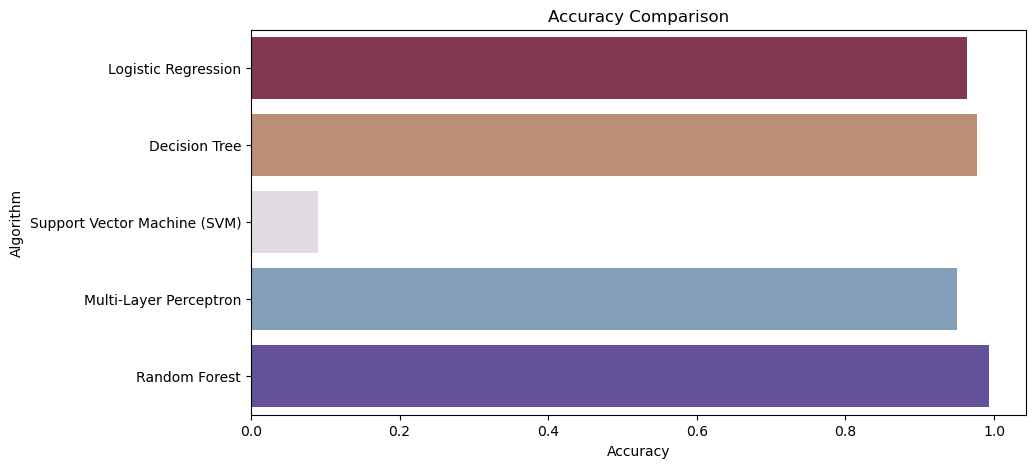

In [43]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = models_list,palette='twilight_shifted_r')

In [45]:
# prints the model name followed by its corresponding accuracy
accuracy_models = dict(zip(models_list, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Logistic Regression --> 0.9636363636363636
Decision Tree --> 0.9772727272727273
Support Vector Machine (SVM) --> 0.09090909090909091
Multi-Layer Perceptron --> 0.95
Random Forest --> 0.9931818181818182
